In [1]:
"""
Solve the differential equations for Earth/Sun orbits using scipy
Plot the result orbits using matplotlib
"""

import math
import numpy as np

from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
# Define some constants - units are in kilograms, kilometers, and days
GRAV_CON = 4.981 * 10 ** (-10) 
MASS_SUN = 1.989 * 10 ** 30
MASS_EARTH = 5.977 * 10 ** 24
INIT_EARTH = (1.495979 * 10 ** 8, 0, 0, 2.56721625 * 10 ** 6)
ORBITS = {}

# Resource paths
DATA_PATH = "data/"
PLOTS_PATH = "plots/"


In [3]:
#########################################################################
# Part 1 -  Solve the orbital equations and plot the resulting orbits


def orbital_eqs(e_0, t_0):
    """
    Input: Tuple e_0 of floats that represent Earth's position (p_x, p_y)
    and velocity (v_x, v_y) at time t_0
    
    Output: Tuple that contains approximation to d(e)/dt,
    computed from the orbital equations
    
    NOTE: The variable t_0 is not used in computing the
    returned value for the orbital equations
    """
    #print(e_0)
    p_x = e_0[0]
    p_y = e_0[1]
    v_x = e_0[2]
    v_y = e_0[3]
    
    # function r(t)
    r_t = math.sqrt(p_x ** 2 + p_y ** 2)
    
    a_x = -((GRAV_CON * MASS_SUN)/(r_t ** 3)) * p_x
    a_y = -((GRAV_CON * MASS_SUN)/(r_t ** 3)) * p_y
     
    return (v_x, v_y, a_x, a_y)

In [4]:
def solve_orbital_eqs(time_steps, speed=1.0):
    """
    Input: numpy array time_steps, optional float speed
    that scales the Earth's initial velocity
    
    Output: Returns a 2D numpy array whose rows are the
    x and y position of the Earth's orbit at specified times
    """
    spd = np.array(INIT_EARTH)
    spd[2:4] *= speed
    return odeint(orbital_eqs, spd, time_steps).T[0:2]


In [5]:
def test_solve_orbital_eqs():
    """ Test solve_orbital_eqs() """
    
    # Small test
    solve_orbital_eqs(np.linspace(0, 1, 3), 1.0)
    solve_orbital_eqs(np.linspace(0, 1, 11), 1.00)
    solve_orbital_eqs(np.linspace(0, 10, 101), 0.5)

    # Compute Earth/Sun orbits and save for later
    sim_steps = np.linspace(0, 1000, 1001)
    ORBITS["075"] = solve_orbital_eqs(sim_steps, 0.75)
    ORBITS["100"] = solve_orbital_eqs(sim_steps, 1.00)
    ORBITS["125"] = solve_orbital_eqs(sim_steps, 1.25)
    ORBITS["150"] = solve_orbital_eqs(sim_steps, 1.50)

test_solve_orbital_eqs()

In [6]:
def plot_earth_coords(orbit, time_steps, title="(p_x(t),p_y(t)) plots"):
    """
    Input: Numpy array orbit whose rows are numpy arrays containing x and y positions
    for the Earth orbit for specified times in the numpy array time_steps
    
    Action: Plot both x positions and y positions versus time_steps
    using matplotlib
    """
    
    fig, axs = plt.subplots()
    axs.plot(time_steps, orbit[0])
    axs.plot(time_steps, orbit[1])
    axs.title.set_text(title)
    axs.set_xlabel('time_steps in days')
    axs.set_ylabel('kilometers from initial position')
    axs.legend(['x positions', 'y positions'], loc='upper right', shadow=True)
    return fig

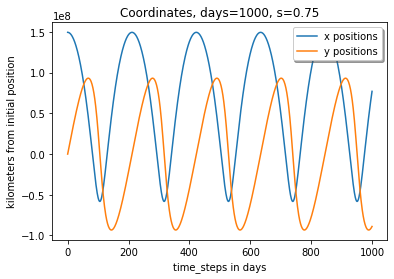

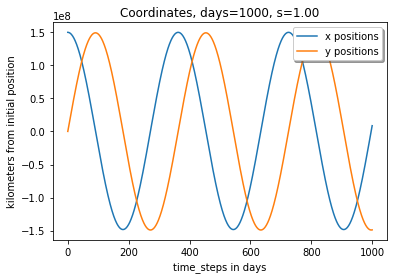

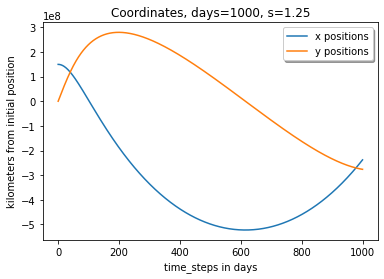

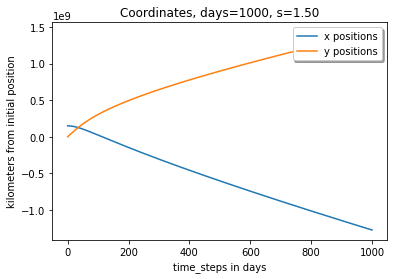

In [7]:
def test_plot_earth_coords():
    """ Test plot_earth_coords """
    
    sim_steps = np.linspace(0, 1000, 1001) 
    plot_earth_coords(ORBITS["075"], sim_steps, "Coordinates, days=1000, s=0.75")
    plot_earth_coords(ORBITS["100"], sim_steps, "Coordinates, days=1000, s=1.00")
    plot_earth_coords(ORBITS["125"], sim_steps, "Coordinates, days=1000, s=1.25")
    plot_earth_coords(ORBITS["150"], sim_steps, "Coordinates, days=1000, s=1.50")

test_plot_earth_coords()

In [8]:
def plot_earth_orbit(orbit, title="Plotted orbit"):
    """
    Input: Numpy array orbit whose rows are numpy arrays containing x and y positions
    for the Earth orbit
    
    Action: Plot x positions versus y positions using matplotlib
    """
    
    fig, axs = plt.subplots()
    axs.plot(orbit[0], orbit[1])
    axs.set(aspect=1.0)
    axs.title.set_text(title)
    axs.set_xlabel('time_steps in days')
    axs.set_ylabel('positions')
    return fig, axs

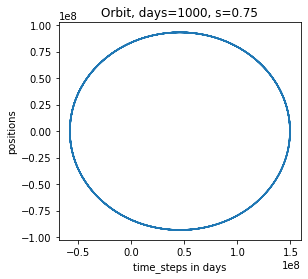

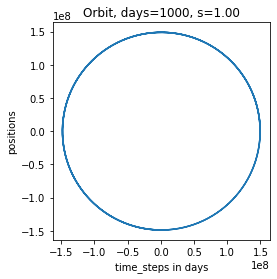

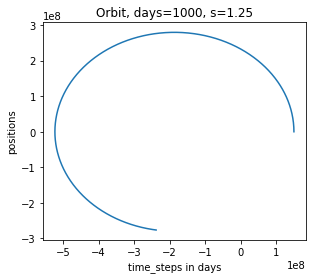

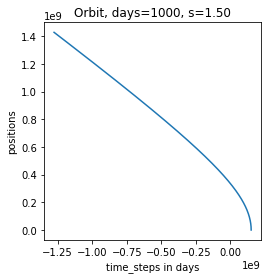

In [9]:
def test_plot_earth_orbit():
    """ Test plot_earth_orbit() """

    plot_earth_orbit(ORBITS["075"], "Orbit, days=1000, s=0.75")
    plot_earth_orbit(ORBITS["100"], "Orbit, days=1000, s=1.00")
    plot_earth_orbit(ORBITS["125"], "Orbit, days=1000, s=1.25")
    plot_earth_orbit(ORBITS["150"], "Orbit, days=1000, s=1.50")

test_plot_earth_orbit()

In [10]:
#########################################################################
# Part 2 - Animate the computed orbits


def extend_limits(limits, pad=0.1):
    """
    Input: Tuple limits = (min_x, max_x, min_y, max_y),
    float pad treated as a percentage

    Output: Tuple of four floats that represent new ranges
    extended by pad (as percentage of range length) in both directions
    """
    x_range = limits[1] - limits[0]
    y_range = limits[3] - limits[2]
    pad_x = pad * x_range
    pad_y = pad * y_range
    
    return (limits[0] - pad_x, limits[1] + pad_x, limits[2] - pad_y, limits[3] + pad_y)

In [11]:
def animate_earth_orbit(orbit, title="Animated orbit"):
    """
    Input: Numpy array orbit whose rows are numpy arrays containing x and y positions
    for the Earth orbit
    
    Output: matplotlib Animation object corresponding to
    plot of x positions versus y positions using matplotlib
    """
    def animate(frame_num):
        """
        Input: Integer frame_num
        
        Action: Updates line with data for given frame
        """
        earth.center = (orbit[0][frame_num], orbit[1][frame_num])
        return earth
    
    earth = plt.Circle((0, 0), 8000000, color="blue")
    
    x_min = min(orbit[0])
    x_max = max(orbit[0])
    y_min = min(orbit[1])
    y_max = max(orbit[1])
    
    extend_lim = extend_limits((x_min, x_max, y_min, y_max))

    fig, axs = plot_earth_orbit(orbit)
    axs.set_xlim(extend_lim[0], extend_lim[1])
    axs.set_ylim(extend_lim[2], extend_lim[3])

    draw_circle = plt.Circle((0, 0), 10000000, color="yellow")

    axs.add_patch(draw_circle)
    axs.add_patch(earth)
    axs.title.set_text(title)
    plt.show()
    
    anim = animation.FuncAnimation(fig, animate, init_func=lambda: animate(0),
                                   frames=200, interval=20, blit=True)
    return anim

Creating animation for speed=0.75


<IPython.core.display.Javascript object>


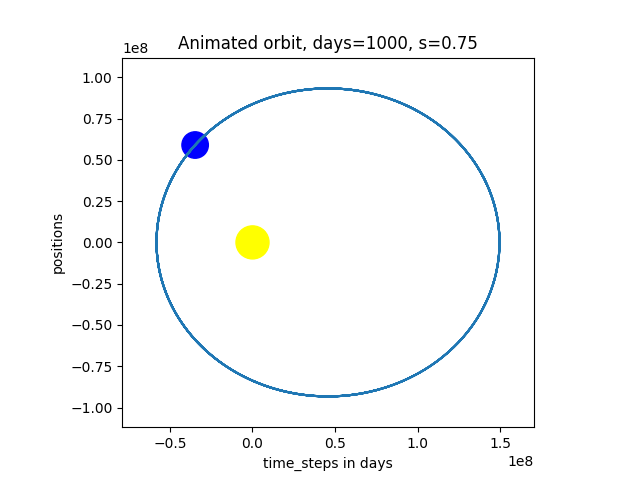

Creating animation for speed=1.00


<IPython.core.display.Javascript object>


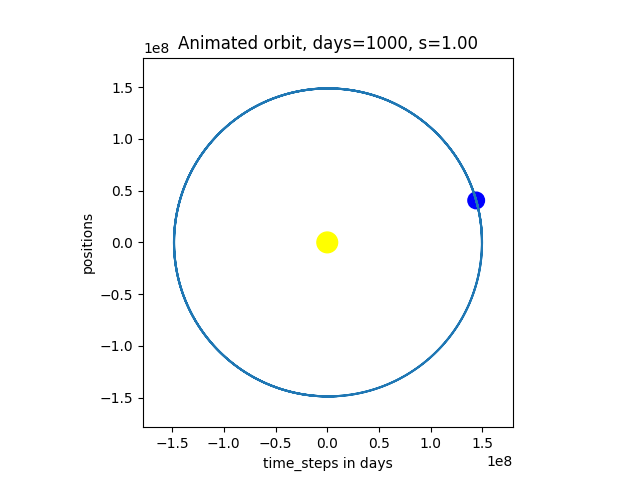

Creating animation for speed=1.25


<IPython.core.display.Javascript object>


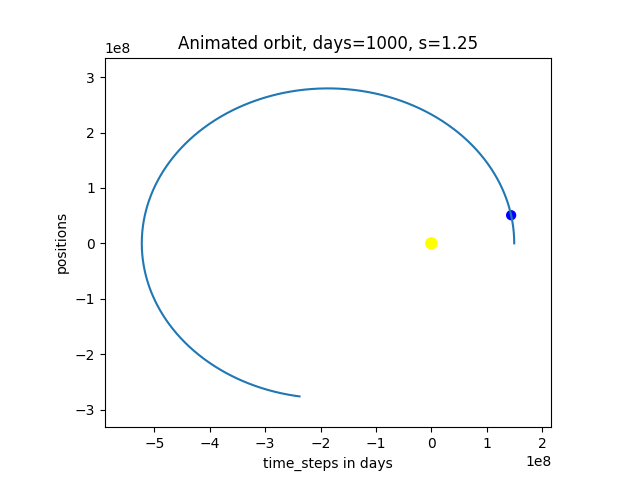

Creating animation for speed=1.50


<IPython.core.display.Javascript object>


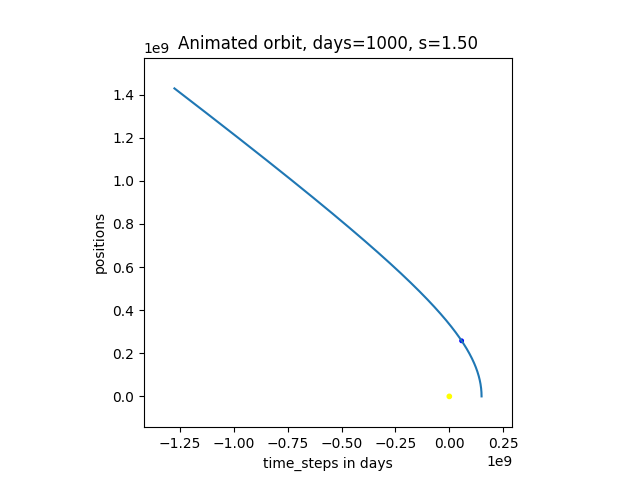

Done


In [12]:
def test_animate_earth_orbit():
    """ Test animate_earth_orbit() """
    
    print("Creating animation for speed=0.75")
    handle1 = animate_earth_orbit(ORBITS["075"], "Animated orbit, days=1000, s=0.75")
    
    print("Creating animation for speed=1.00")
    handle2 = animate_earth_orbit(ORBITS["100"], "Animated orbit, days=1000, s=1.00")
    
    print("Creating animation for speed=1.25")
    handle3 = animate_earth_orbit(ORBITS["125"], "Animated orbit, days=1000, s=1.25")
    
    print("Creating animation for speed=1.50")
    handle4 = animate_earth_orbit(ORBITS["150"], "Animated orbit, days=1000, s=1.50")
    print("Done")
        
    return handle1, handle2, handle3, handle4

%matplotlib notebook
# Save handles to animation objects so they are not garbage collected
HANDLES = test_animate_earth_orbit()

## Question 1##
**What are the geometric shapes of the various orbits computed by your simulations?**

The geometric shapes of the various orbits include circles, ellipses, and partial ellipses.  

## Question 2##
**What happened to the earth's trajectory when we increased its initial velocity by 50%?**

As the velocity increases, the earth's trajectory changes from a circle revolving around the sun to a line that no longer orbits the sun.